In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import glob, os
from sdt_dask.dask_tool.runner import Runner

## Local Client example 
 use local csv dataplug and local client

### Instantiate a localfile data plug

In [3]:
from sdt_dask.dataplugs.csv_plug import LocalFiles

In [4]:
LocalFiles?

Init signature: LocalFiles(path_to_files, ext='.csv')
Docstring:     
Dataplug class for retrieving data from some source. It's recommended
that user-created dataplug inherit from this class to ensure compatibility.

The initialization argument for each class will be different depending on
the source. The main requirement is to keep the ``Dataplug.get_data`` method,
and make sure the args and returns as defined here.
File:           /mnt/c/Users/22720/OneDrive/Documents/solar-data-tools/sdt_dask/dataplugs/csv_plug.py
Type:           type
Subclasses:     

In [5]:
path = "../dataplugs/example_data/"
local_file_data_plug = LocalFiles(path_to_files=path)
local_file_keys = [(os.path.basename(fname)[:-4],) for fname in glob.glob(path + "*")]
local_file_keys.append(('NotExist',))
local_file_keys

[('001C4B0008A5',), ('ALL0VALUETESTFILE',), ('NotExist',)]

In [6]:
local_file_data_plug.get_data(local_file_keys[0])

,ac_power_01
ts,
2017-09-13 06:22:32,0.0
2017-09-13 06:37:32,18.0
2017-09-13 06:52:32,53.0
2017-09-13 07:07:35,70.0
2017-09-13 07:22:34,136.0
...,...
2018-10-12 16:51:04,217.0
2018-10-12 17:06:04,131.0
2018-10-12 17:21:04,54.0


### Set a local User-defined Client

In [8]:
from sdt_dask.clients.local_client import LocalClient

In [11]:
client_setup = LocalClient(workers=3,
                           threads=1,
                           memory=4
                           )
local_client = client_setup.init_client()

local_client.dashboard_link

Memory per worker exceeds system memory (4 GB), activating memory spill


Dask Dashboard Link: http://127.0.0.1:8787/status



'http://127.0.0.1:8787/status'

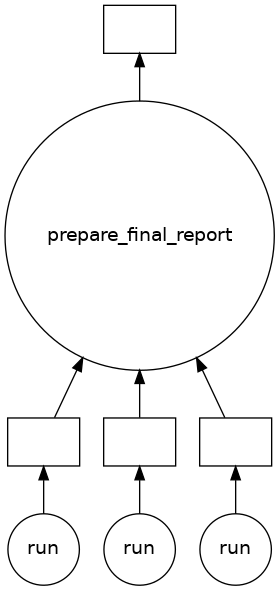

In [12]:
dask_tool = Runner(local_file_data_plug, local_client, output_path="../results/")
dask_tool.set_up(local_file_keys, fix_shifts=True, verbose=True)

dask_tool.visualize()

from IPython.display import display, Image
display(Image(filename='sdt_graph.png'))

In [13]:
%%time
dask_tool.get_result()


            *********************************************
            * Solar Data Tools Data Onboarding Pipeline *
            *********************************************

            This pipeline runs a series of preprocessing, cleaning, and quality
            control tasks on stand-alone PV power or irradiance time series data.
            After the pipeline is run, the data may be plotted, filtered, or
            further analyzed.

            Authors: Bennet Meyers and Sara Miskovich, SLAC

            (Tip: if you have a mosek [https://www.mosek.com/] license and have it
            installed on your system, try setting solver='MOSEK' for a speedup)

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            

            *********************************************
            * Solar Dat

task list:  43%|██████████████▌                   | 3/7 [00:10<00:18,  4.73s/it]2024-05-01 23:12:16,075 - distributed.worker.memory - WARNING - Worker is at 100% memory usage. Pausing worker.  Process memory: 4.03 GiB -- Worker memory limit: 4.00 GiB
2024-05-01 23:12:16,076 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 4.03 GiB -- Worker memory limit: 4.00 GiB
2024-05-01 23:12:26,120 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 4.65 GiB -- Worker memory limit: 4.00 GiB
2024-05-01 23:12:36,121 - distributed.worke



total time: 154.68 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              10.60s
Cleaning                   15.49s
Filtering/Summarizing      128.59s
    Data quality           0.36s
    Clear day detect       0.33s
    Clipping detect        125.45s
    Capacity change detect 2.45s


            ************************************************
            * Solar Data Tools Degradation Estimation Tool *
            ************************************************

            Monte Carlo sampling to generate a distributional estimate
            of the degradation rate [%/yr]

            The distribution typically stabilizes in 50-100 samples.

            Author: Bennet Meyers, SLAC

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            

187it [00:48,  3.84it/s]


P50, P02.5, P97.5: -10.147, -11.640, -6.009
changes: -8.949e-01, 0.000e+00, 0.000e+00
P50, P02.5, P97.5: -10.147, -13.197, -6.009
changes: 1.996e-01, 0.000e+00, 0.000e+00
P50, P02.5, P97.5: -8.507, -13.185, -6.010
changes: -7.508e-02, 4.304e-03, -7.868e-05
P50, P02.5, P97.5: -8.357, -13.142, -6.010
changes: -2.724e-03, 4.304e-03, -7.868e-05
P50, P02.5, P97.5: -8.476, -13.099, -5.596
changes: 1.540e-02, 4.304e-03, -2.383e-02
P50, P02.5, P97.5: -8.607, -13.056, -5.835
changes: -3.382e-02, 4.304e-03, -2.383e-02
P50, P02.5, P97.5: -8.584, -12.990, -6.010
changes: -2.237e-02, 1.285e-02, -7.868e-05
P50, P02.5, P97.5: -8.717, -13.238, -5.860
changes: -5.527e-02, -9.102e-02, -5.478e-03
P50, P02.5, P97.5: -8.717, -13.223, -5.843
changes: 4.313e-02, 1.493e-03, 6.598e-02
P50, P02.5, P97.5: -8.753, -13.208, -5.866
changes: 7.395e-03, 1.493e-03, -2.325e-03
P50, P02.5, P97.5: -8.753, -13.185, -5.790
changes: -1.787e-02, 4.304e-03, -2.336e-05
P50, P02.5, P97.5: -8.717, -13.142, -5.386
changes: 1.787e

2024-05-01 23:15:10,559 - distributed.nanny - WARNING - Worker process still alive after 3.1999989318847657 seconds, killing
2024-05-01 23:15:10,563 - distributed.nanny - WARNING - Worker process still alive after 3.1999992370605472 seconds, killing


CPU times: user 25.9 s, sys: 4.46 s, total: 30.3 s
Wall time: 3min 40s
